In [1]:
import numpy as np
from package_.plots import plot_two_variables_with_start_point

In [2]:
# f = lambda x, y: 4 ** 3 + y ** 2 - 6 * x * y - y + 7
# f_x_1 = lambda x, y: -6 * y
# f_x_2 = lambda y: 0
# f_x_3 = lambda y: 0
# 
# f_y_1 = lambda x, y: -6 * x + 2 * y - 1
# f_y_2 = lambda x: 2
# f_y_3 = lambda x: 0
# 
# START_X = 4
# START_Y = 4
# EPSILON = 0.00001

In [3]:
f = lambda x, y: 10 * x ** 2 + 12 * x * y + 10 * y ** 2

f_x_1 = lambda x, y: 20 * x + 12 * y
f_x_2 = lambda y: 20
f_x_3 = lambda y: 0

f_y_1 = lambda x, y: 12 * x + 20 * y
f_y_2 = lambda x: 12
f_y_3 = lambda x: 0

START_X = 10
START_Y = 10
EPSILON = 0.07

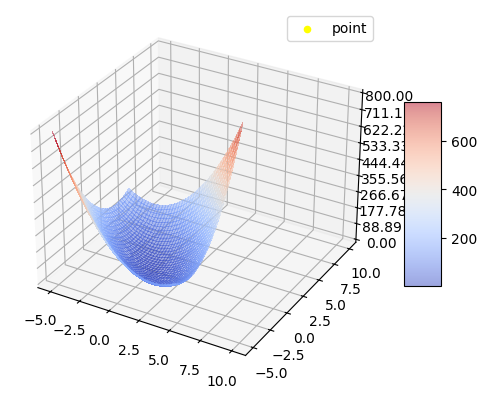

In [4]:
plot_two_variables_with_start_point(START_X, START_Y, f)

In [5]:
def statistic_method(f_1, f_2, f_3, epsilon, prev_iter, a=-100, b=100):
    if f_2(a) * f_2(b) < 0 and f_3(a) * f_3(b) < 0:
        print("Warunki zbieżności nie są spełnione.")

    if f_3(a) * f_1(a, prev_iter) > 0:
        x0 = a
    else:
        x0 = b

    xn = x0
    while True:
        xni = xn - f_1(xn, prev_iter) / f_2(xn)
        if abs(f_1(xni, prev_iter)) < epsilon or abs(xni - xn) < epsilon:
            return xni
        xn = xni

In [6]:
def gradient(f, x, y):
    h = 0.00001
    df_dx = (f(x + h, y) - f(x, y)) / h
    df_dy = (f(x, y + h) - f(x, y)) / h
    return np.array([df_dx, df_dy])

In [7]:
def gauss_seidel(initial_point, epsilon):
    x, y = initial_point

    x_new = statistic_method(f_x_1, f_x_2, f_x_3, epsilon, y)
    y_new = statistic_method(f_x_1, f_x_2, f_x_3, epsilon, x_new)

    while True:
        if np.linalg.norm(gradient(f, x_new, y_new)) <= epsilon:
            return x_new, y_new 
    
        y_new = x_new
        
        x_new = statistic_method(f_x_1, f_x_2, f_x_3, epsilon, y_new)
        y_new = statistic_method(f_y_1, f_y_2, f_y_3, epsilon, x_new)

In [8]:
gauss_seidel([START_X, START_Y], EPSILON)

(0.002821109907443997, -0.004701849845744732)